In [1]:
import os
os.getcwd()

'C:\\Users\\L E N O V O\\Desktop\\santhoshi\\projects\\my code'

In [2]:
%%writefile sunny.py
def greet(suma):
    return f"Hello, {sunny}!"

Overwriting sunny.py


In [3]:
import sunny as greet
import pandas as pd
def greet_read_csv(file_path='C:\\Users\\L E N O V O\\Desktop\\santhoshi\\guru_projects\\INSURE'):
    try:
        a = pd.read_csv(file_path)
        return a
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        return None

# Exploratory Data Analysis

In [4]:
import sunny as greet
a = greet_read_csv("Insurance.csv")  
if a is not None:
    print(a)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [5]:
a.duplicated().sum()

1

In [6]:
import sunny as greet
a = a.drop_duplicates()

In [7]:
a.duplicated().sum()

0

In [8]:
a.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
a.shape

(1337, 7)

In [11]:
a.describe(include='all')   #Generating Statistics for the Dataset

,age,sex,bmi,children,smoker,region,expenses
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.665520,1.095737,NaN,NaN,13279.121638
std,14.044333,NaN,6.100664,1.205571,NaN,NaN,12110.359657
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4746.340000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.160000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.720000


# Converting objects to numeric

In [12]:
a.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
a['smoker']=a['smoker'].map({'yes':1,"no":0})

In [14]:
a.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86


In [15]:
a['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
a['region']=a['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [17]:
a.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,1,16884.92
1,18,male,33.8,1,0,2,1725.55
2,28,male,33.0,3,0,2,4449.46
3,33,male,22.7,0,0,3,21984.47
4,32,male,28.9,0,0,3,3866.86


In [18]:
a['sex']=a['sex'].map({'female':0,'male':1})

In [19]:
a.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


# Storing Feature Matrix In X and Response(Target) In Vector y

In [20]:
X = a.drop(['expenses'],axis=1)
y = a['expenses']

# Train/Test split

In [21]:
from sklearn.model_selection import train_test_split     #Importing the Function
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)   #Splitting the Data

# Import the models

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR() # Support Vector Regression
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on Test Data

In [24]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [25]:
df1

,Actual,Lr,svm,rf,gr
900,8688.86,8072.773331,9285.046873,10592.6874,10440.601101
1064,5708.87,5592.826031,9160.047578,5477.4406,7193.942041
1256,11436.74,14384.173654,9304.073967,12713.2340,13592.509726
298,38746.36,31735.184973,9173.348009,43677.2925,39164.241937
237,4463.21,9163.154452,9176.205147,6737.7935,6336.622406
...,...,...,...,...,...
534,13831.12,16959.440619,9364.040377,14228.2672,14073.337906
542,13887.20,15496.754452,9363.471563,14122.6817,14424.353165
760,3925.76,6310.859309,9133.968962,12905.4378,7439.651796
1284,47403.88,38247.546968,9356.130592,47862.9110,47716.982605


# Compare Performance Visually

In [26]:
import matplotlib.pyplot as plt

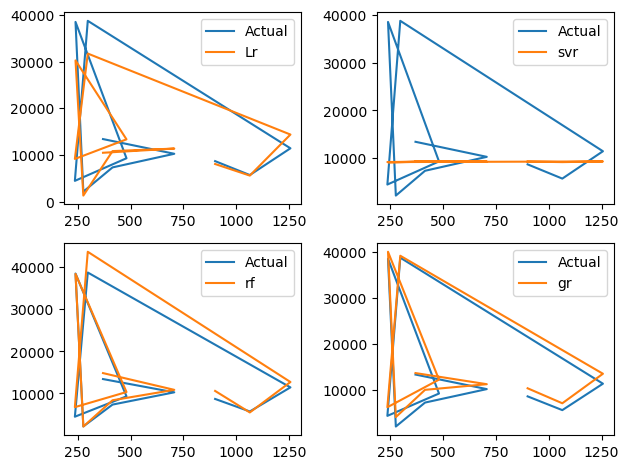

In [27]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

# Evaluating the Algorithm

In [28]:
from sklearn import metrics

In [29]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [30]:
print(score1,score2,score3,score4)

0.8068280291899952 -0.1344469486786597 0.8845887212466761 0.8974338597716427


In [31]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [32]:
print(s1,s2,s3,s4)

4182.597271311557 9249.564867994342 2563.0185835820885 2600.70441818048


# Predicting Expenses

In [33]:
a = {'age' : 40,
     'sex' : 1,
     'bmi' : 40.30,
     'children' : 4,
     'smoker' : 1,
     'region' : 2}

In [34]:
df = pd.DataFrame(a,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [35]:
new_pred = gr.predict(df)
print("Insurance cost for New Customer is : ",new_pred[0])

Insurance cost for New Customer is :  43030.861353494765


From above we found that RandomForestRegressor is the best model for this dataset. Before production, it is good practice to train our model on the entire dataset.

In [36]:
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

Predicting Charges For New Customer after traing the model with RandomForestRegressor 

In [37]:
new_pred = rf.predict(df)
print("Insurance cost for New Customer is : ",new_pred[0])

Insurance cost for New Customer is :  42857.33809999999


In [41]:
import pickle

# Assuming 'df' is your DataFrame
with open('a.pkl', 'wb') as file:
    pickle.dump(df, file)


In [42]:
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2
